## Homework 1

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time
from matplotlib import pyplot as plt

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

C:\Users\User\AppData\Local\Temp\ipykernel_17848\4235274757.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


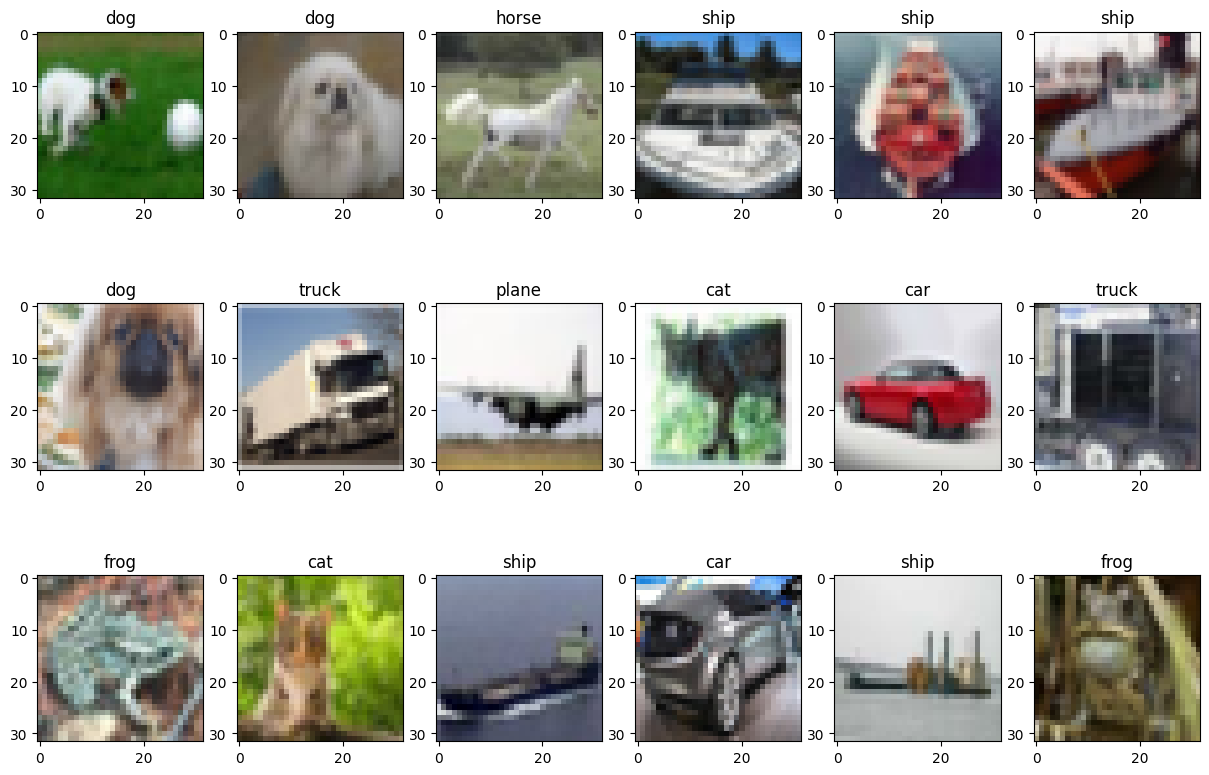

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
plt.rcParams['figure.figsize'] = [15, 10]
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

In [3]:
# Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

## Model 1

In [4]:
# Build the classifier
input_layer = Input(shape=(size, size, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)

In [5]:
model = Model(input_layer, output_layer)

# Show the model
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 25
batch_size = 128
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0     

Train Acc      0.8747199773788452
Validation Acc 0.7024999856948853


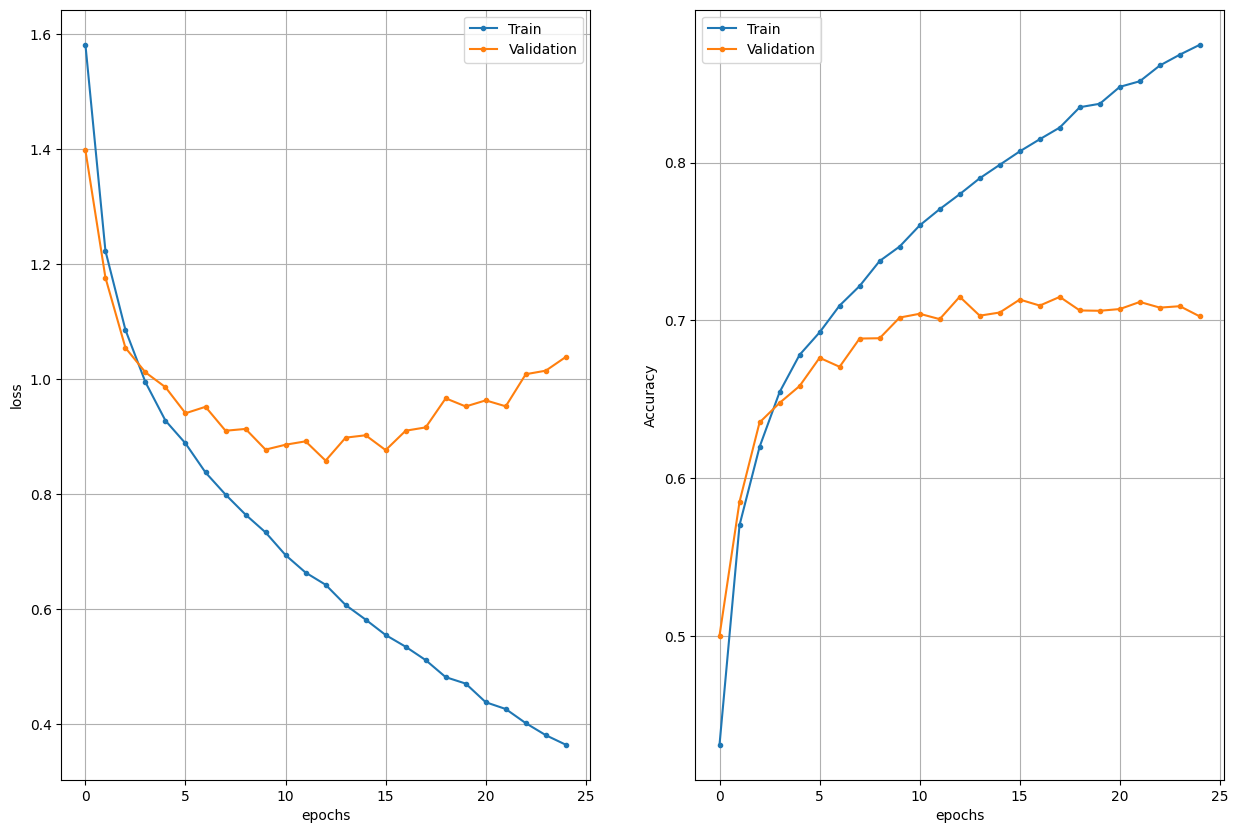

In [6]:
# Show training history
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [7]:
# Compute the labels and the predictions as sparse values
y_true = y_test
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    acc = np.mean(y_pred[y_true == class_id] == class_id)
    print(class_name, acc)

313/313 [==============================] - 3s 8ms/step
plane 0.689
car 0.832
bird 0.582
cat 0.408
deer 0.682
dog 0.705
frog 0.776
horse 0.741
ship 0.792
truck 0.818


In [8]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 8ms/step - loss: 1.0382 - accuracy: 0.7025
Test loss   1.0382018089294434
Test metric 0.7024999856948853


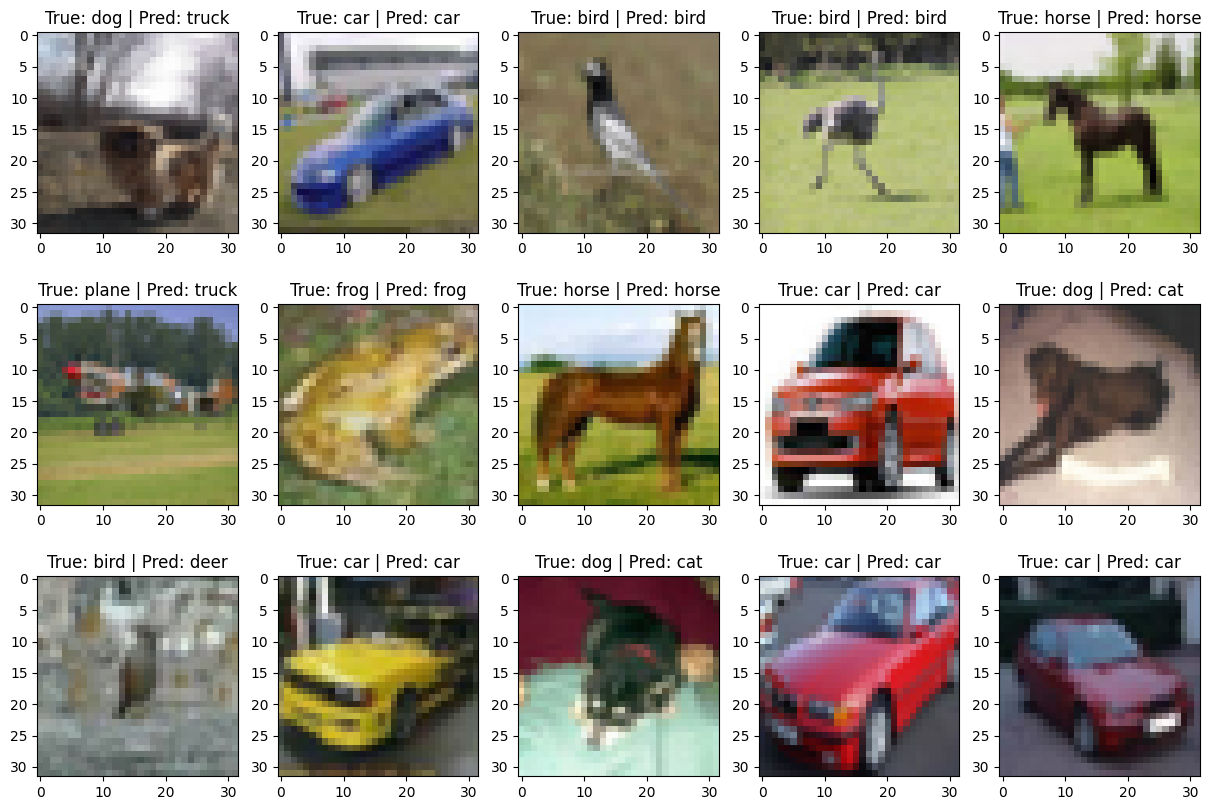

In [9]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

plt.show()

## Model 2

In [14]:
# Build the simplified classifier
input_layer = Input(shape=(size, size, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
output_layer = Dense(num_classes, activation='softmax')(x)


model = Model(input_layer, output_layer)

# Show the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82826 (323.54 KB)
Trainable params: 82826 (323.54 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 16s 39ms/step - loss: 1.5991 - accuracy: 0.4401 - val_loss: 1.4012 - val_accuracy: 0.5019
Epoch 2/25
391/391 [==============================] - 16s 41ms/step - loss: 1.2842 - accuracy: 0.5570 - val_loss: 1.2674 - val_accuracy: 0.5587
Epoch 3/25
391/391 [==============================] - 16s 41ms/step - loss: 1.1957 - accuracy: 0.5883 - val_loss: 1.2118 - val_accuracy: 0.5771
Epoch 4/25
391/391 [==============================] - 16s 41ms/step - loss: 1.1286 - accuracy: 0.6106 - val_loss: 1.2173 - val_accuracy: 0.5749
Epoch 5/25
391/391 [==============================] - 16s 41ms/step - loss: 1.0801 - accuracy: 0.6295 - val_loss: 1.1544 - val_accuracy: 0.5937
Epoch 6/25
391/391 [==============================] - 16s 40ms/step - loss: 1.0470 - accuracy: 0.6402 - val_loss: 1.1076 - val_accuracy: 0.6172
Epoch 7/25
391/391 [==============================] - 18s 47ms/step - loss: 1.0110 - accuracy: 0.6520 - val_loss: 1.1102 - val_accuracy:

## Model 3

In [18]:
from tensorflow.keras.layers import Dropout

input_layer = Input(shape=(size, size, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)  # Додати Dropout
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)  # Додати Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Додати Dropout
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(input_layer, output_layer)

# Show the model
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                      

Train Acc      0.7159199714660645
Validation Acc 0.7303000092506409


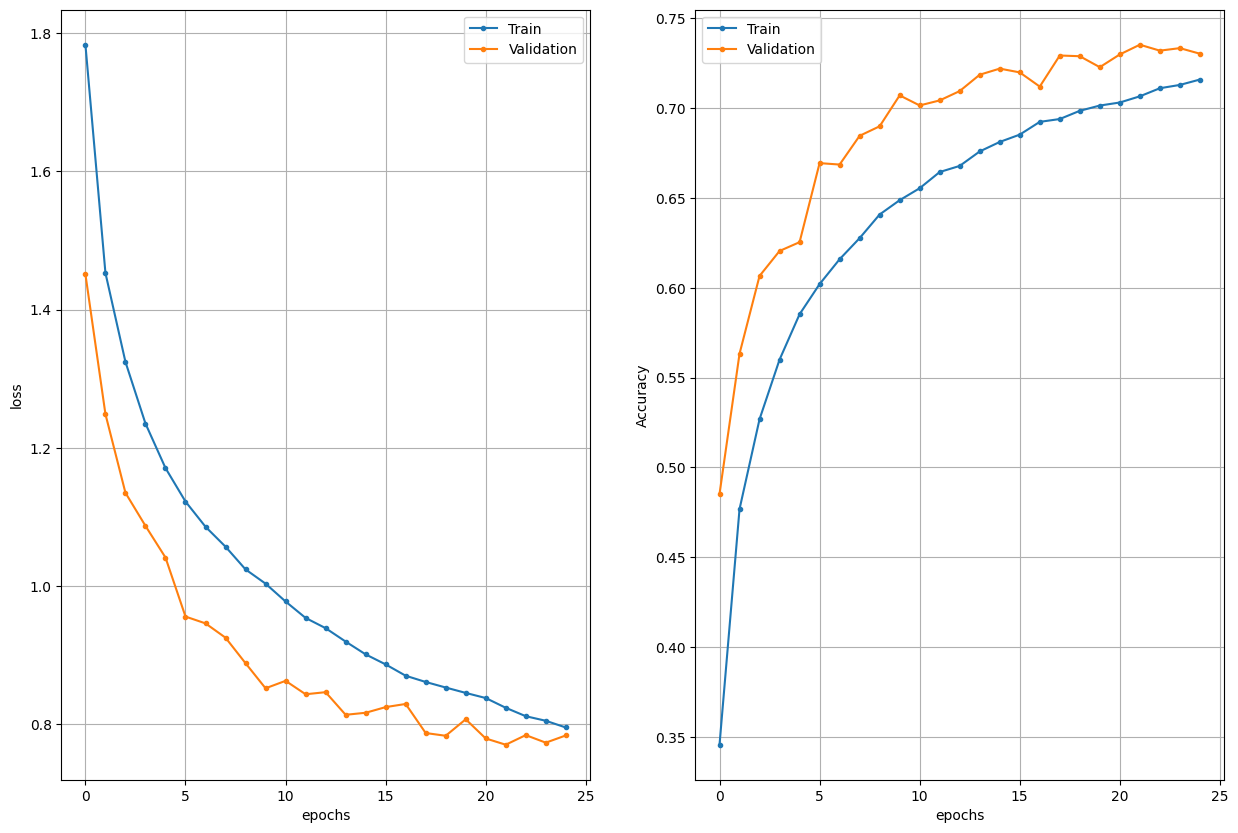

In [19]:
# Show training history
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])